# Overview
This is a sequel to [Part 1](https://www.kaggle.com/code/theophilusonyejiaku/part-1-gridsearchcv-hperparameter-tuning-r2-0-5), which involved the tuning of models using the `GridSearchCV`. At the end of the [Part 1](https://www.kaggle.com/code/theophilusonyejiaku/part-1-gridsearchcv-hperparameter-tuning-r2-0-5), we were only able to achieve a metric score of `0.5` (**50% accuracy**); this is so because we did not check for outliers and did not consider some feature engineering on our data. 

In this **"Part 2"**, we take a closer look at our data and did some proper cleaning, outliers detection and removal (the unwanted ones) and repeated the same tuning process using the `GridSearchCV` like we did in [Part 1](https://www.kaggle.com/code/theophilusonyejiaku/part-1-gridsearchcv-hperparameter-tuning-r2-0-5). Fortunately, we got a better improvement in our models' metrics scores as shown in the table below:

|Model|R Squared value|
|----|----|
|Random Forest|0.745351|
|XGB|0.694323|
|kneighbor|0.603231|
|Decision Tree|0.582967|
|Lasso|0.173845|
|Linear Regression|0.173824|



## What is HyperParameter Tuning?
Hyperparameter tuning is a simple way to find which parameter values are best for a model. Just as the name implies, it(GridSearchCV) takes every possible parameter of a model you pass to it, tunes them and get the best parameters for the model.

# Loading Libraries
Importing the Necessary Libraries required for the task

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the data & EDA

In [2]:
df = pd.read_csv('../input/car-price-prediction-challenge/car_price_prediction.csv')

In [3]:
df.shape

(19237, 18)

In [4]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [5]:
df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [6]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [7]:
df.duplicated().sum()

313

In [8]:
df.drop_duplicates(keep='first', inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object

In [11]:
for col in df.columns:
    print(f"{col} with {df[col].nunique()} values")

ID with 18924 values
Price with 2315 values
Levy with 559 values
Manufacturer with 65 values
Model with 1590 values
Prod. year with 54 values
Category with 11 values
Leather interior with 2 values
Fuel type with 7 values
Engine volume with 107 values
Mileage with 7687 values
Cylinders with 13 values
Gear box type with 4 values
Drive wheels with 3 values
Doors with 3 values
Wheel with 2 values
Color with 16 values
Airbags with 17 values


In [12]:
df.drop("ID", axis=1, inplace=True)

In [13]:
df.head(3)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2


In [14]:
df['Mileage'] = df['Mileage'].str.replace("km", '')

In [15]:
df["Mileage"] = df["Mileage"].astype("int64")

In [16]:
df.head(3)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  object 
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  object 
 9   Mileage           18924 non-null  int64  
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Doors             18924 non-null  object 
 14  Wheel             18924 non-null  object 
 15  Color             18924 non-null  object 
 16  Airbags           18924 non-null  int64 

In [18]:
len(df.loc[df["Levy"]=="-"])

5709

In [19]:
df["Levy"] = df["Levy"].str.replace("-", "0")

In [20]:
len(df.loc[df["Levy"]=="-"])

0

In [21]:
df["Levy"] = df["Levy"].astype("int64")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int64  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  object 
 9   Mileage           18924 non-null  int64  
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Doors             18924 non-null  object 
 14  Wheel             18924 non-null  object 
 15  Color             18924 non-null  object 
 16  Airbags           18924 non-null  int64 

In [23]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [24]:
df["Leather interior"].value_counts()

Yes    13731
No      5193
Name: Leather interior, dtype: int64

In [25]:
df["Leather interior"] = df["Leather interior"].replace({"Yes": "1", "No": "0"})

In [26]:
df["Leather interior"].value_counts()

1    13731
0     5193
Name: Leather interior, dtype: int64

In [27]:
df["Leather interior"] = df["Leather interior"].astype("int64")

In [28]:
df.head(4)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,0,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0


In [29]:
cat_columns = [col for col in df.columns if df[col].dtype=="O"]
cat_columns

['Manufacturer',
 'Model',
 'Category',
 'Fuel type',
 'Engine volume',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color']

In [30]:
for col in df[cat_columns]:
    changeable_column = len(df[col].value_counts()) > 2 
    print(f"{changeable_column} for {col}\n")

True for Manufacturer

True for Model

True for Category

True for Fuel type

True for Engine volume

True for Gear box type

True for Drive wheels

True for Doors

False for Wheel

True for Color



In [31]:
df["Wheel"].value_counts()

Left wheel          17471
Right-hand drive     1453
Name: Wheel, dtype: int64

In [32]:
df["Wheel"] = df["Wheel"].replace({"Left wheel": "0", "Right-hand drive": "1"})

In [33]:
df["Wheel"] = df["Wheel"].astype("int64")

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int64  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  int64  
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  object 
 9   Mileage           18924 non-null  int64  
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Doors             18924 non-null  object 
 14  Wheel             18924 non-null  int64  
 15  Color             18924 non-null  object 
 16  Airbags           18924 non-null  int64 

In [35]:
df.head(4)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,0,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,0,Black,8
2,8467,0,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000,4.0,Variator,Front,04-May,1,Black,2
3,3607,862,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,0,White,0


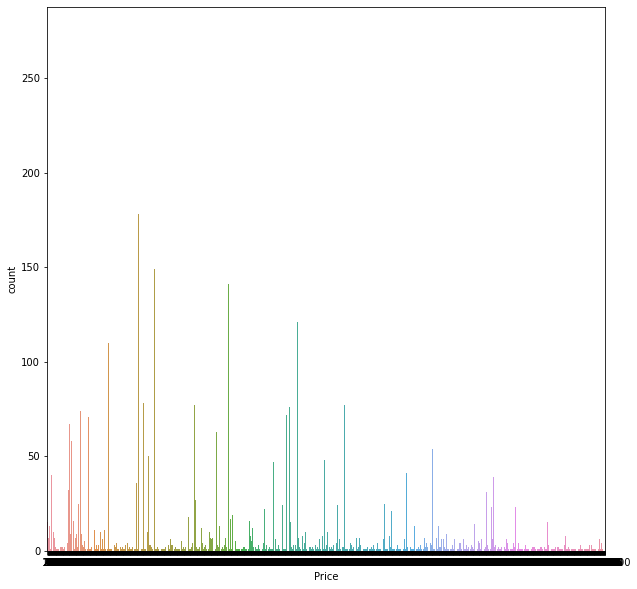

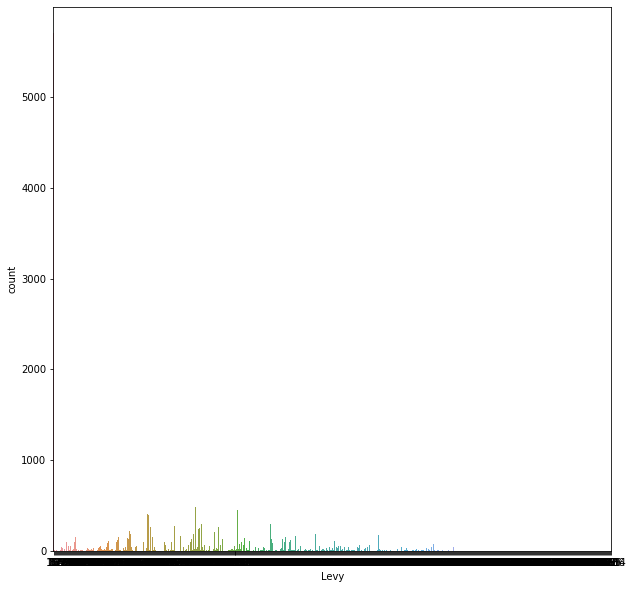

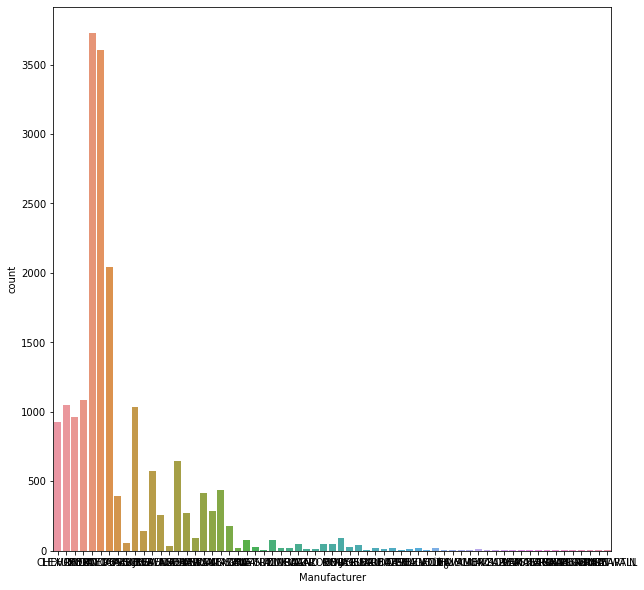

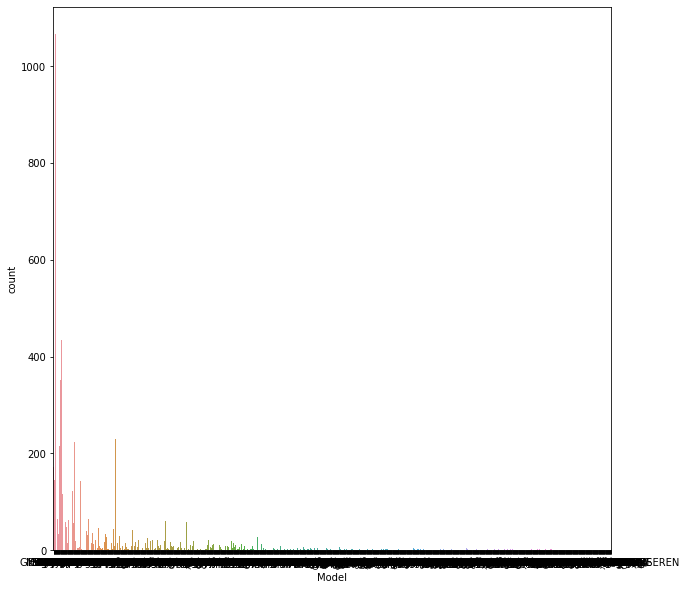

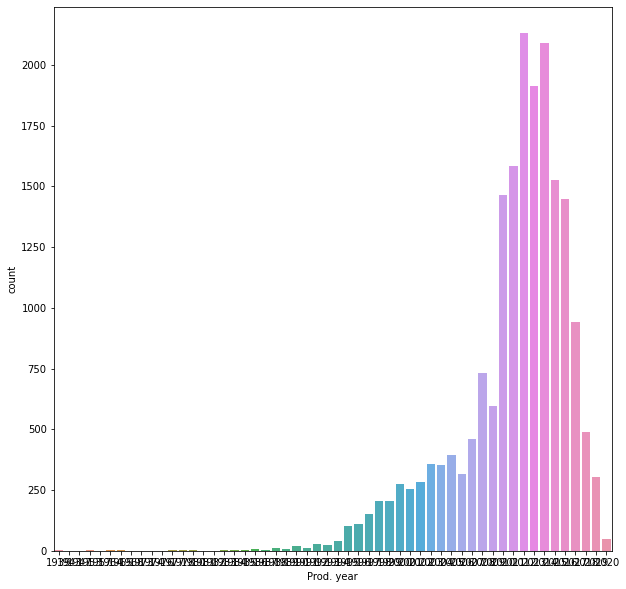

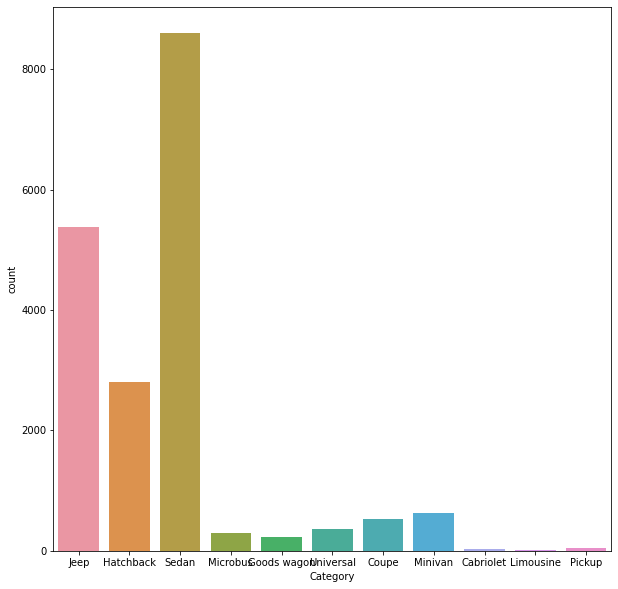

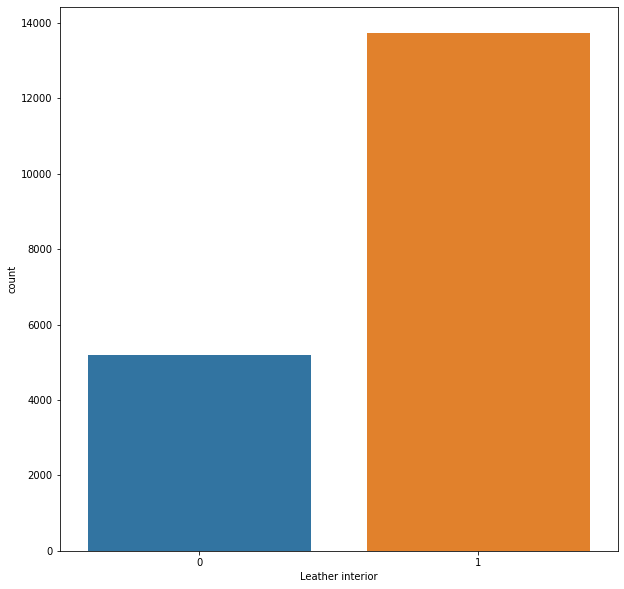

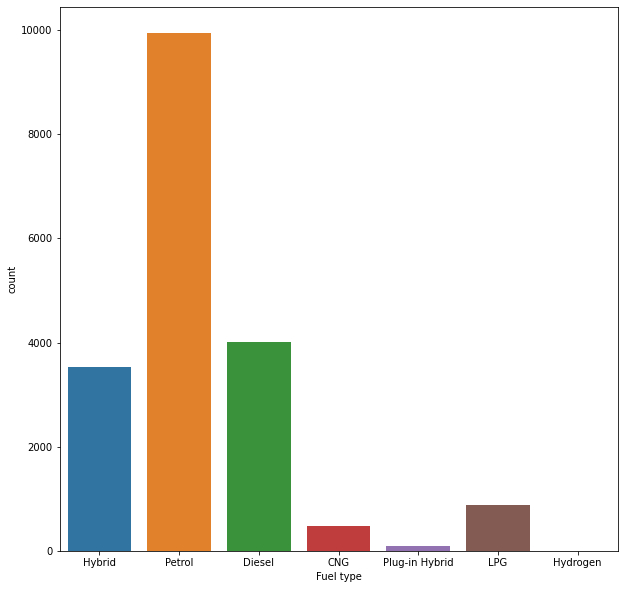

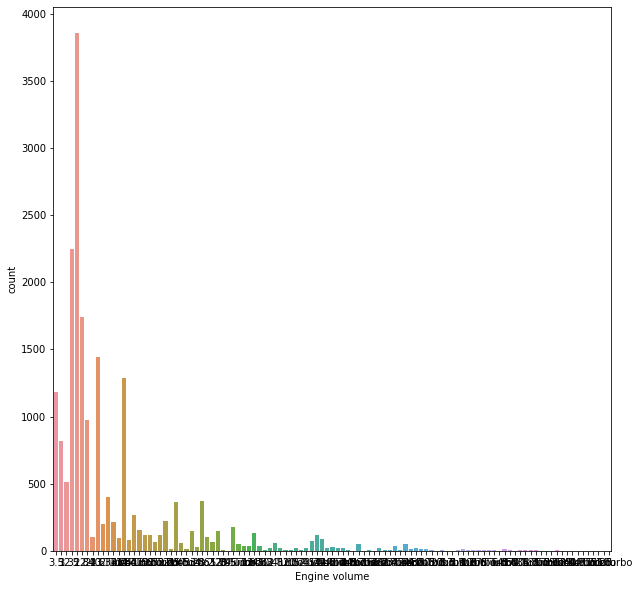

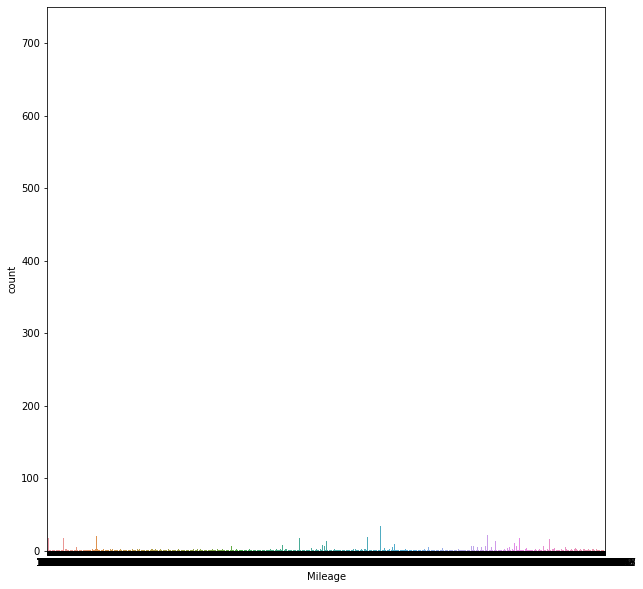

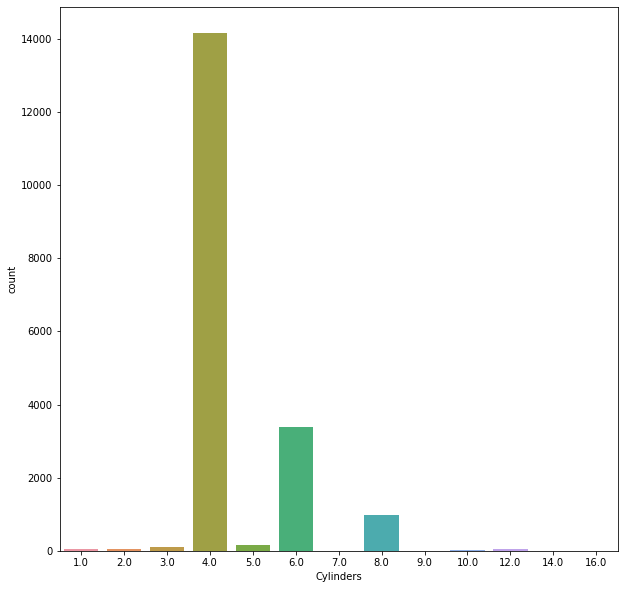

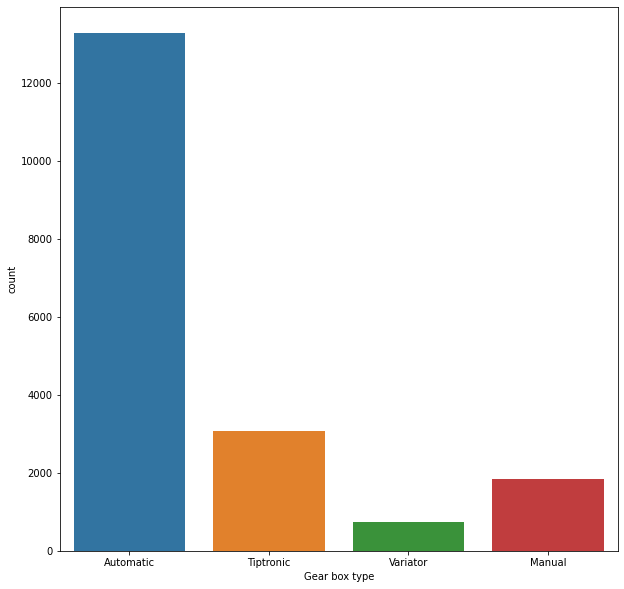

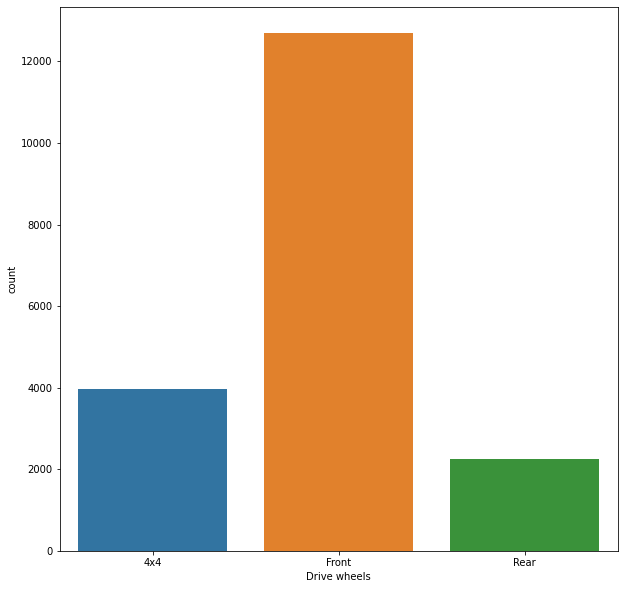

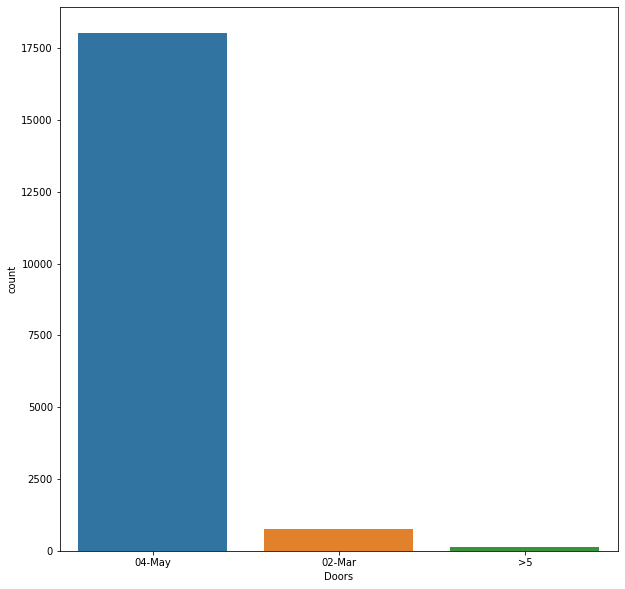

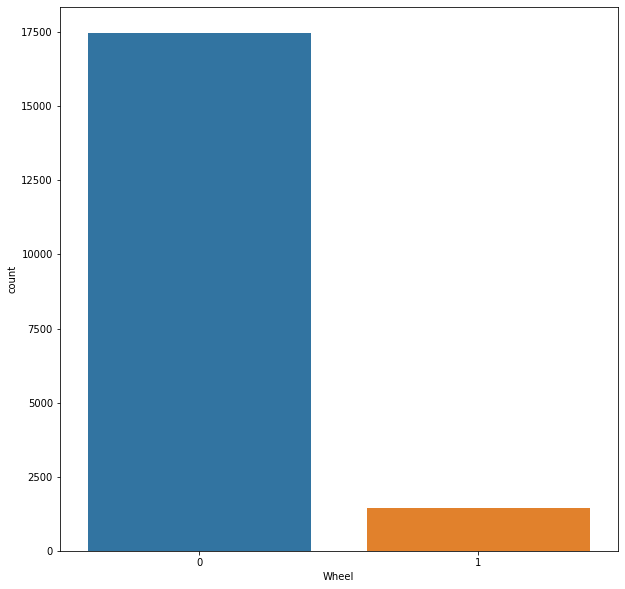

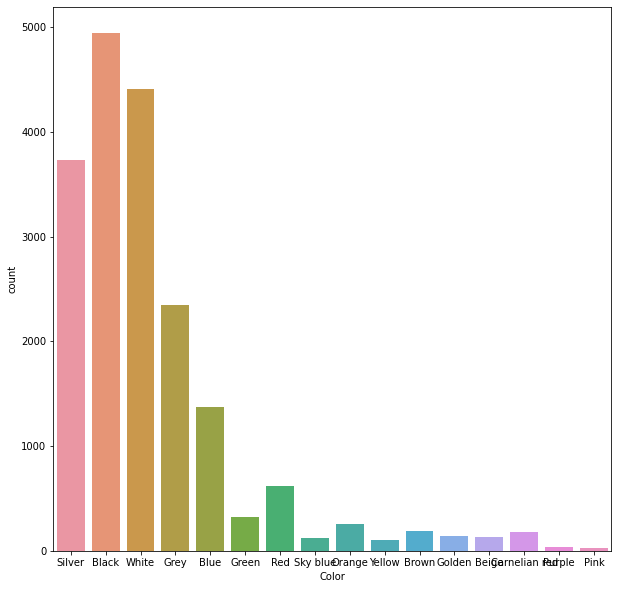

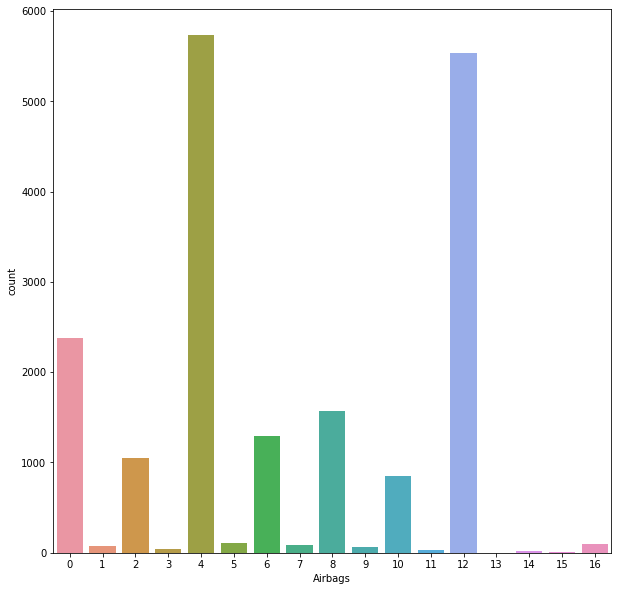

In [36]:
for col in df.columns:
    plt.figure(figsize=(10,10))
    sns.countplot(data=df, x=df[col])

# Checking for outliers in our data

In [37]:
numerical_columns = [col for col in df.columns if df[col].dtype=='int64']
numerical_columns

['Price',
 'Levy',
 'Prod. year',
 'Leather interior',
 'Mileage',
 'Wheel',
 'Airbags']

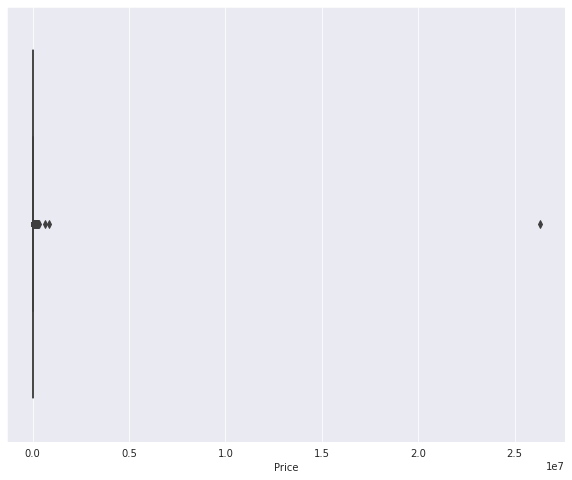

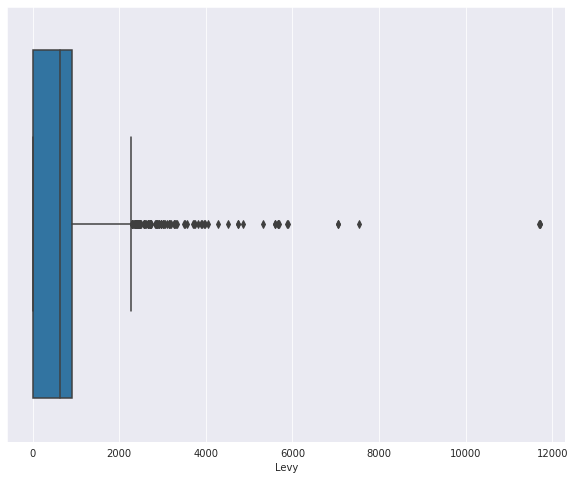

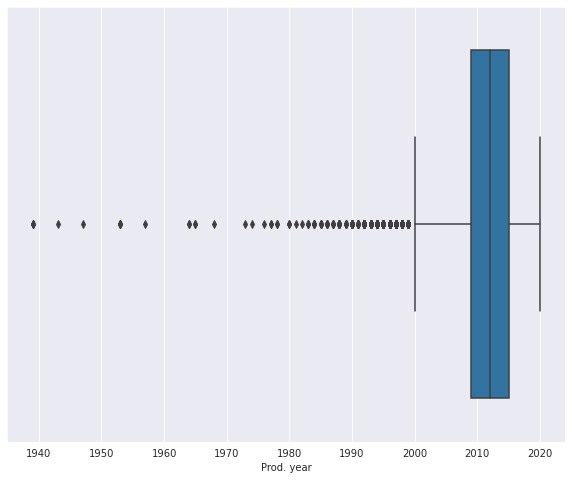

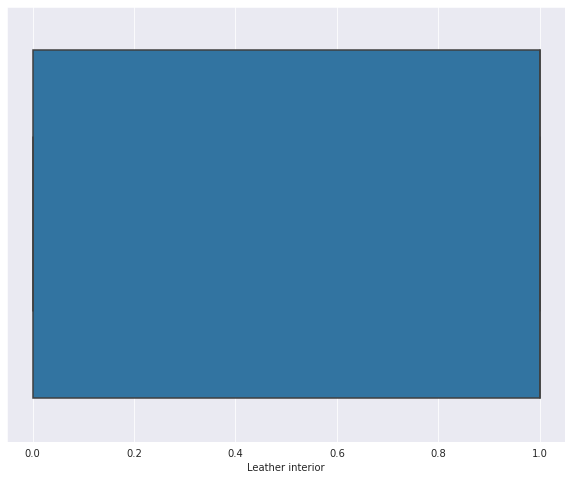

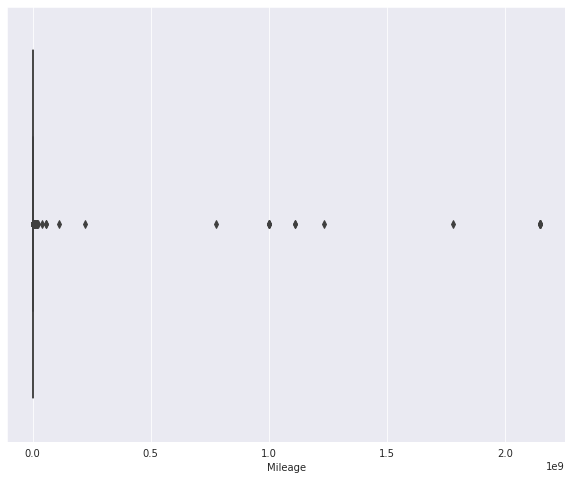

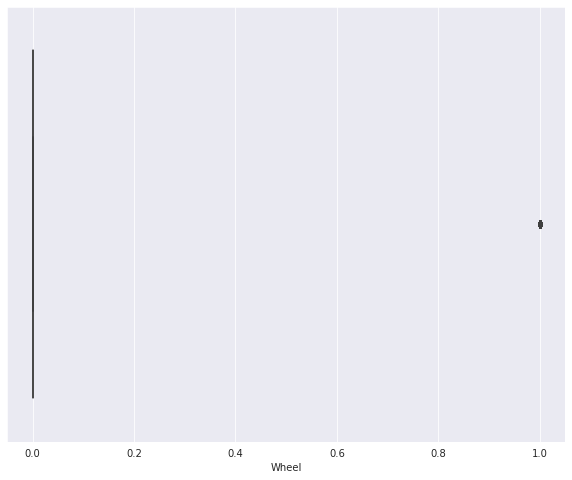

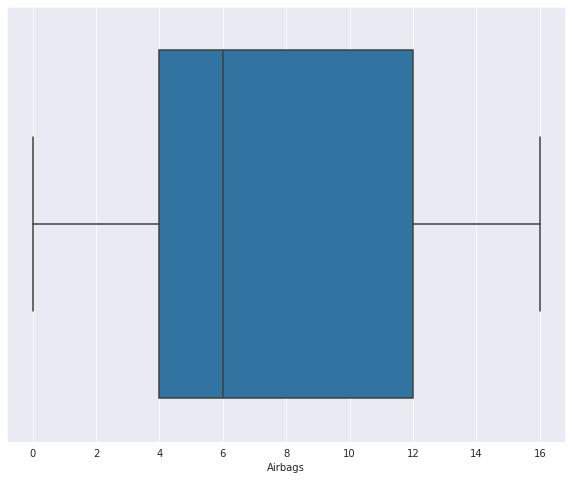

In [38]:
for col in df[numerical_columns]:
    plt.figure(figsize=(10,8))
    sns.set_style("darkgrid")
    sns.boxplot(x=df[col])

Taking closer look at the target value `"Price"`

<AxesSubplot:xlabel='Price'>

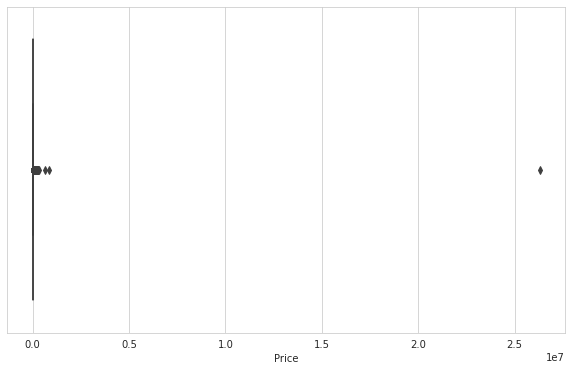

In [39]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.boxplot(x=df["Price"])

In [40]:
df.loc[df['Price']>=1000000]

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
16983,26307500,0,OPEL,Combo,1999,Goods wagon,0,Diesel,1.7,99999,4.0,Manual,Front,02-Mar,0,Blue,0


So I actually checked for **"OPEL Comon 1999"** and realized this must have been an error in the input. 
There are better ways to check for outliers anyways, and one of them is by using the interquartile range.

In [41]:
outlier = [col for col in df.columns if len(df[col].unique())>200]
outlier

['Price', 'Levy', 'Model', 'Mileage']

<AxesSubplot:>

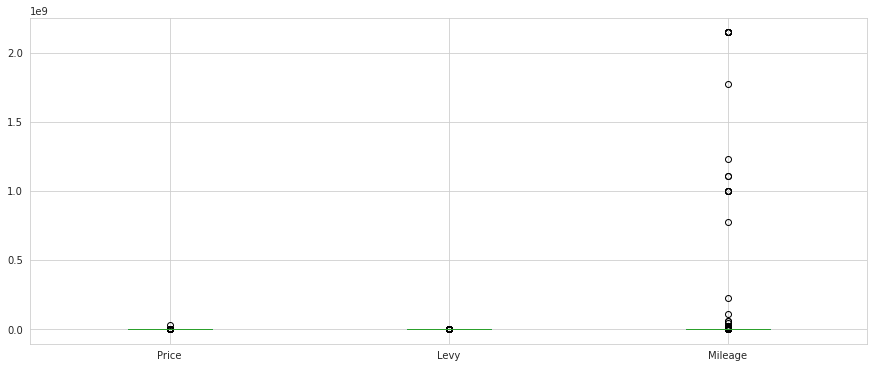

In [42]:
df[['Price', 'Levy', 'Model', 'Mileage']].boxplot(figsize=(15,6))

In [43]:
Q1 = df[outlier].quantile(0.25)
Q3 = df[outlier].quantile(0.75)
IQR = Q3 - Q1
IQR

Price       16732.0
Levy          917.0
Mileage    118924.0
dtype: float64

In [44]:
df = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


In [45]:
len(df)

17090

In [46]:
df.head(5)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,0,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,0,Black,8
2,8467,0,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000,4.0,Variator,Front,04-May,1,Black,2
3,3607,862,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,0,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901,4.0,Automatic,Front,04-May,0,Silver,4


# Encoding

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
encoder = LabelEncoder()

In [49]:
for col in cat_columns:
    df[col] = encoder.fit_transform(df[col])
    

In [50]:
df.head(3)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,28,1150,2010,4,1,2,61,186005,6.0,0,0,1,0,12,12
1,16621,1018,6,616,2011,4,0,5,54,192000,6.0,2,0,1,0,1,8
2,8467,0,18,639,2006,3,0,5,21,200000,4.0,3,1,1,1,1,2


# Correlation

<AxesSubplot:>

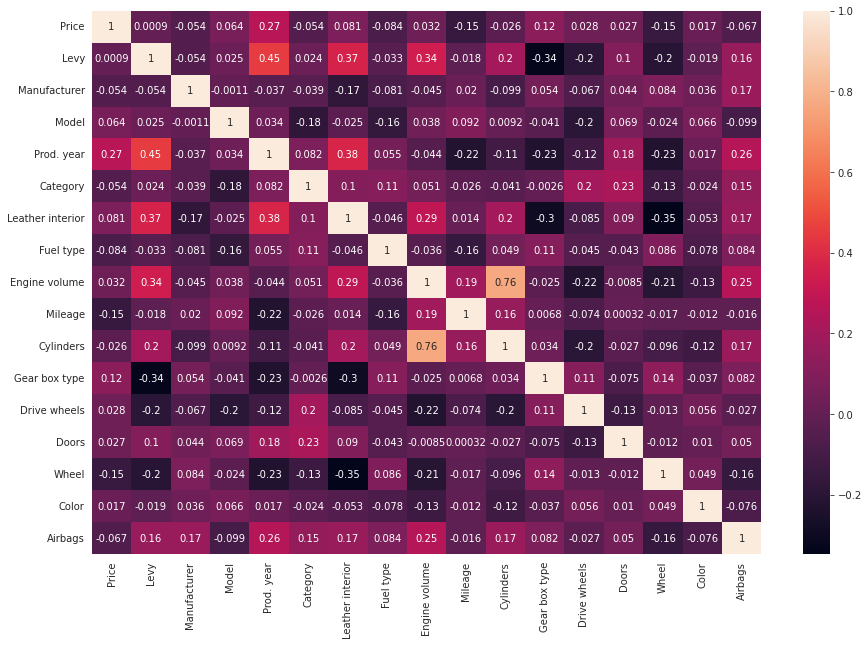

In [51]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(), annot=True)

We can see from the above that none of our data features are in correlation to our target variable, `Price`

In [52]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,28,1150,2010,4,1,2,61,186005,6.0,0,0,1,0,12,12
1,16621,1018,6,616,2011,4,0,5,54,192000,6.0,2,0,1,0,1,8
2,8467,0,18,639,2006,3,0,5,21,200000,4.0,3,1,1,1,1,2
3,3607,862,13,619,2011,4,1,2,45,168966,4.0,0,0,1,0,14,0
4,11726,446,18,639,2014,3,1,5,21,91901,4.0,0,1,1,0,12,4


In [53]:
X = df.drop("Price", axis=1)
y = df.iloc[:, [0]]

In [54]:
X.head(3)

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,1399,28,1150,2010,4,1,2,61,186005,6.0,0,0,1,0,12,12
1,1018,6,616,2011,4,0,5,54,192000,6.0,2,0,1,0,1,8
2,0,18,639,2006,3,0,5,21,200000,4.0,3,1,1,1,1,2


In [55]:
y.head(3)

,Price
0,13328
1,16621
2,8467


# Splitting

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [58]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (13672, 16)
X_test: (3418, 16)
y_train: (13672, 1)
y_test: (3418, 1)


In [59]:
# Scaling our data 
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [61]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [62]:
print(X_train.shape)
print(X_test.shape)

(13672, 16)
(3418, 16)


# 1. Linear Regression Model

In [63]:
from sklearn.linear_model import LinearRegression 

In [64]:
lr = LinearRegression()

In [65]:
# we will need to determine the best of parameter for the model using the gridsearchcv
from sklearn.model_selection import GridSearchCV

In [66]:
parameter = {"fit_intercept":[True, False], "normalize":[True, False]}
lrcv = GridSearchCV(lr, parameter, scoring='r2', cv=5)
lrcv.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring='r2')

In [67]:
lrcv.best_params_

{'fit_intercept': True, 'normalize': True}

In [68]:
from sklearn.metrics import r2_score
lrcv_predict = lrcv.predict(X_test)
score = r2_score(y_true=y_test, y_pred=lrcv_predict)
score

0.17382377824967665

# 2. Decision Tree Model

In [69]:
from sklearn.tree import DecisionTreeRegressor

In [70]:
dtree = DecisionTreeRegressor(random_state=0)

In [71]:
parameter = {"criterion":['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 
             "max_features":['auto', 'sqrt', 'log2'],
            "max_leaf_nodes":[5,10,100,200,50,20]}
dtreecv = GridSearchCV(dtree, parameter, scoring='neg_mean_squared_error', cv=5)
dtreecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [5, 10, 100, 200, 50, 20]},
             scoring='neg_mean_squared_error')

In [72]:
prediction = dtreecv.predict(X_test)
score = r2_score(y_true=y_test, y_pred=prediction)
score

0.5829667287578977

# 3. Lasso Model

In [73]:
from sklearn.linear_model import Lasso

In [74]:
lasso = Lasso(random_state=0)

In [75]:
parameter={'alpha':[0.01,0.001,0.0001,0.5,1]}
lassocv=GridSearchCV(lasso,parameter,scoring='r2',cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(random_state=0),
             param_grid={'alpha': [0.01, 0.001, 0.0001, 0.5, 1]}, scoring='r2')

In [76]:
prediction = lassocv.predict(X_test)
score = r2_score(y_true = y_test, y_pred=prediction)
score

0.17384510840981027

# 4. Random Forest Regressor

In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
rf =RandomForestRegressor(random_state= 0)

In [79]:
parameter = {
    'max_features': [2, 3],
    'n_estimators': [100, 200, 300, 1000]
}
rfcv = GridSearchCV(rf,parameter,scoring='r2',cv=5)
rfcv.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_features': [2, 3],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='r2')

In [80]:
prediction = rfcv.predict(X_test)
score = r2_score(y_true = y_test, y_pred = prediction)
score

0.7453513686425342

# 5. KNeighbor

In [81]:
from sklearn.neighbors import KNeighborsRegressor

In [82]:
kn = KNeighborsRegressor()

In [83]:
parameter = {"n_neighbors":[1,2,3,4,5,10,20,50]}
kncv = GridSearchCV(kn,parameter, scoring='r2',cv=5)
kncv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 10, 20, 50]},
             scoring='r2')

In [84]:
prediction = kncv.predict(X_test)
score = r2_score(y_true=y_test, y_pred=prediction)
score

0.6032308073303307

# 6. XGB Regressor

In [85]:
from xgboost import XGBRegressor

In [86]:
xgb = XGBRegressor()

In [87]:
parameters = {'learning_rate': [.03, 0.05, .07], 'n_estimators': [100, 200,500]}

xgbcv =GridSearchCV(xgb,parameter, scoring='neg_mean_squared_error',cv=5)
xgbcv.fit(X_train, y_train)

[10:11:30] WARNING: ../src/learner.cc:627: 
Parameters: { "n_neighbors" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:11:32] WARNING: ../src/learner.cc:627: 
Parameters: { "n_neighbors" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:11:33] WARNING: ../src/learner.cc:627: 
Parameters: { "n_neighbors" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,


In [88]:
prediction = xgbcv.predict(X_test)
score = r2_score(y_true=y_test, y_pred=prediction)
score

0.6943229282528045

# Summary of the Tuned Models

In [89]:
# LINEAR REGRESSION MODEL
linear = lrcv.predict(X_test)

# DECISION TREE MODEL
dtree = dtreecv.predict(X_test)

# LASSO 
lasso = lassocv.predict(X_test)

# RANDOM FOREST
random_forest = rfcv.predict(X_test)

# KNEIGHBOR
kneighbor = kncv.predict(X_test)

# XGB
xgb =  xgbcv.predict(X_test)


predictions = {"Linear Regression": linear,
          "Decision Tree": dtree, 
          "Lasso" : lasso,
         "Random Forest": random_forest,
         "kneighbor": kneighbor,
         "xgb" : xgb}

In [90]:
def get_scores(predictions, y_test):
    model_score = {}
    for name, value in predictions.items():
        model_score[name] = r2_score(y_true=y_test, y_pred=value)
    return model_score

In [91]:
summary = get_scores(predictions, y_test)
summary = pd.DataFrame([summary])
summary = summary.melt(var_name="Models", value_name="R2 Scores")
summary

,Models,R2 Scores
0,Linear Regression,0.173824
1,Decision Tree,0.582967
2,Lasso,0.173845
3,Random Forest,0.745351
4,kneighbor,0.603231
5,xgb,0.694323


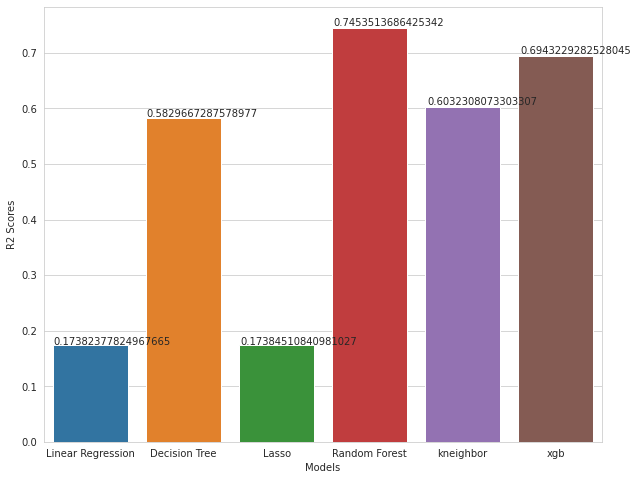

In [92]:
plt.figure(figsize=(10,8))
ax = sns.barplot(data=summary, x=summary['Models'], y=summary["R2 Scores"])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()*1.005, p.get_height()*1.005))

# Conclusion

We have seen that the Random Forest Model has the best metric(R Squared) score of `0.74` than the rest. We were able to get this better in our model tuning because we were able to remove unwanted outliers from our data and did some thorough cleaning on our data as well.

Therefore, we can now conclude that taking care of outliers, feature engineering on our data and thorough cleaning of our data can help improve the accuracy of our model.

# Author's Note
Thank you so very much for taking out your time to view my work. Please do well to leave a feedback on your thoughts about my notebook. They will go a long way in helping me become better. GRACIAS!